<a href="https://colab.research.google.com/github/varna10/CODSOFT/blob/main/Movie_genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install spacy

In [28]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 31.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [29]:
import numpy as np # linear algebra
import pandas as pd
import os

In [30]:
for dirname, _, filenames in os.walk(r"C:\Users\dhaar\OneDrive\Documents\IOT RECORD\INTERNSHIP DATASET"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import spacy

from scipy import sparse
train=pd.read_csv( "train_data.txt",sep=':::',header=None,names=['id','title','genre','description'])
test=pd.read_csv( "test_data.txt",sep=':::',header=None,names=['id','title','genre','description'])


In [33]:
train

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [34]:
test

,id,title,genre,description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",NaN
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,NaN
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,NaN
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",NaN


In [35]:
train=train.drop(['id'],axis=1)
test=test.drop(['id'],axis=1)
train['title'][0].split('(')[-1][:4]

'2009'

In [36]:
train['title'][0].split('(')[:-1][0]

' Oscar et la dame rose '

In [37]:
def extract_year(data):
    if data.split('(')[-1][:4].isdigit():
        return int(data.split('(')[-1][:4])
    return None

train['year']=train['title'].apply(extract_year)
test['year']=test['title'].apply(extract_year)

In [38]:
def transform_title(data):
    if data.split('(')[-1][:4].isdigit():
        return data.split('(')[:-1][0]
    return None

train['title']=train['title'].apply(transform_title)
test['title']=test['title'].apply(transform_title)

In [39]:
train

,title,genre,description,year
0,Oscar et la dame rose,drama,Listening in to a conversation between his do...,2009.0
1,Cupid,thriller,A brother and sister with a past incestuous r...,1997.0
2,"Young, Wild and Wonderful",adult,As the bus empties the students for their fie...,1980.0
3,The Secret Sin,drama,To help their unemployed father make ends mee...,1915.0
4,The Unrecovered,drama,The film's title refers not only to the un-re...,2007.0
...,...,...,...,...
54209,"""Bonino""",comedy,This short-lived NBC live sitcom centered on ...,1953.0
54210,None,horror,The NEXT Generation of EXPLOITATION. The sist...,NaN
54211,Ronald Goedemondt: Ze bestaan echt,documentary,"Ze bestaan echt, is a stand-up comedy about g...",2008.0
54212,Make Your Own Bed,comedy,Walter and Vivian live in the country and hav...,1944.0


In [40]:
missing_val=test.isna().sum()['year']
total_val=test.shape[0]
print(f'"Year" Column on test dataset got {(missing_val/total_val)*100} percent missing values.')

"Year" Column on test dataset got 5.119926199261993 percent missing values.


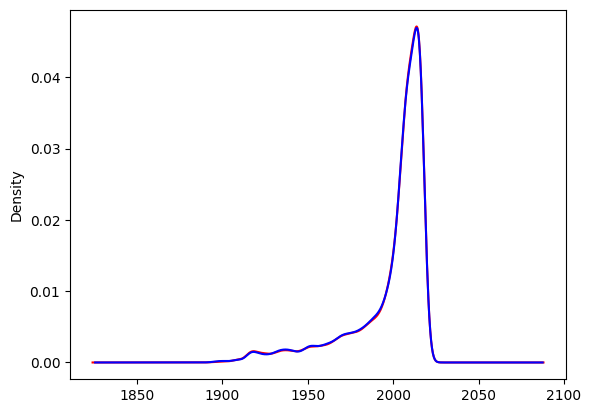

In [41]:
train['year'].plot(kind='kde',color='red')
test['year'].plot(kind='kde',color='blue')
plt.show()

In [42]:
import numpy as np

import pandas as pd

import regex as re

import nltk

import matplotlib.pyplot as plt



from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

from gensim.models import Word2Vec



import warnings

warnings.filterwarnings('ignore')
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        51522 non-null  object 
 1   genre        54214 non-null  object 
 2   description  54214 non-null  object 
 3   year         51522 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.7+ MB


In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        51425 non-null  object 
 1   genre        54200 non-null  object 
 2   description  0 non-null      float64
 3   year         51425 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.7+ MB


In [44]:
# Check for null values

train.isnull().sum()

,0
title,2692
genre,0
description,0
year,2692


In [45]:
test.isnull().sum()

,0
title,2775
genre,0
description,54200
year,2775


In [46]:
train.head()

,title,genre,description,year
0,Oscar et la dame rose,drama,Listening in to a conversation between his do...,2009.0
1,Cupid,thriller,A brother and sister with a past incestuous r...,1997.0
2,"Young, Wild and Wonderful",adult,As the bus empties the students for their fie...,1980.0
3,The Secret Sin,drama,To help their unemployed father make ends mee...,1915.0
4,The Unrecovered,drama,The film's title refers not only to the un-re...,2007.0


In [47]:
train['genre'].nunique()

27

In [48]:
train['genre'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [49]:
train['genre'].value_counts()

,count
genre,
drama,13613
documentary,13096
comedy,7447
short,5073
horror,2204
thriller,1591
action,1315
western,1032
reality-tv,884


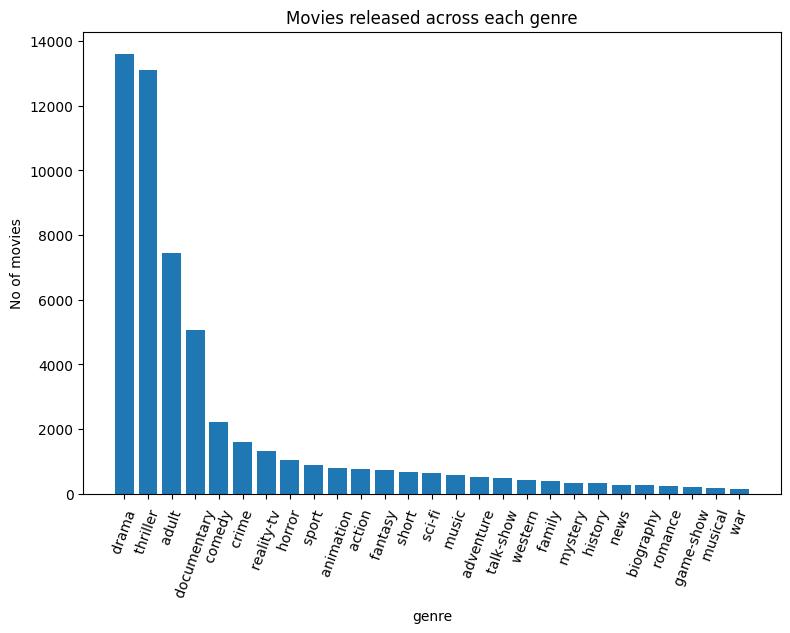

In [50]:
# Plotting the distribution of movies across each genre



plt.figure(figsize=(9,6))

plt.bar(train['genre'].unique(),train['genre'].value_counts())

plt.title('Movies released across each genre')

plt.xlabel('genre')

plt.ylabel('No of movies')

plt.xticks(rotation = 70)

plt.show()

In [51]:
# Splitting the training data



x_train = train.iloc[:,1].values # Considering only the movie description as a feature to predict the genre of the movie

y_train = train.iloc[:,-1].values



# Selecting the testing data

x_test = test.iloc[:,-1].values # Considering only the movie description as a feature to predict the genre of the movie

In [52]:
def process_text(text):

    ''' This function performing text cleaning & converts words into it's base form '''



    # Convert to lowercase

    sentence = text.lower()



    # Removing username

    sentence = re.sub(r'@[a-zA-Z0-9_.]+','',sentence)



    # Removing URLs

    sentence = re.sub(r"https?://\S+|www\.\S+",'',sentence)



    # Character normalization

    sentence = re.sub(r"([a-zA-Z])\1{2,}", r'\1', sentence)



    # Removing punctuations

    sentence = re.sub(r'[^\w\s]','',sentence)



    # Removing stopwords & converting to lowercase

    english_stop = stopwords.words('english')

    sentence = ' '.join([word for word in sentence.split() if word not in english_stop])



    # Performing word tokenization

    sentence = word_tokenize(sentence) # Returns a list of words



    # Performing lemmatization

    lemmatizer = WordNetLemmatizer()

    sentence = ' '.join([lemmatizer.lemmatize(word) for word in sentence])



    return sentence
import nltk

# Representing the processed text as a list of words


for i, desc in enumerate(x_test):
    if not isinstance(desc, str):
        print(f"Non-string value at index {i}: {desc}")
x_test_low = [str(desc).split() for desc in x_test]

import numpy as np
x_test = [desc if isinstance(desc, str) else '' for desc in x_test]  # Replace with empty string
x_test_low = [desc.split() for desc in x_test]

Streaming output truncated to the last 5000 lines.
Non-string value at index 49200: 2016.0
Non-string value at index 49201: 2015.0
Non-string value at index 49202: 2000.0
Non-string value at index 49203: 2014.0
Non-string value at index 49204: 2006.0
Non-string value at index 49205: 2015.0
Non-string value at index 49206: 2017.0
Non-string value at index 49207: 2013.0
Non-string value at index 49208: 2016.0
Non-string value at index 49209: 2012.0
Non-string value at index 49210: 2017.0
Non-string value at index 49211: 2009.0
Non-string value at index 49212: 2017.0
Non-string value at index 49213: 2017.0
Non-string value at index 49214: 2001.0
Non-string value at index 49215: 2016.0
Non-string value at index 49216: 1975.0
Non-string value at index 49217: 2013.0
Non-string value at index 49218: 1988.0
Non-string value at index 49219: 2006.0
Non-string value at index 49220: 2009.0
Non-string value at index 49221: 2015.0
Non-string value at index 49222: 2013.0
Non-string value at index 492